# Loading Data..

In [7]:
import pandas as pd

speech = pd.read_csv('9.csv')
emotiono = pd.read_csv('emotion.csv')
gaze = pd.read_csv('gaze.csv')


# Analyzing the Speech Dataset


## Descriptive Statistics

The Three most Dominant emotions are:
positive:  0.62
confident:  0.59
hesitant:  0.54


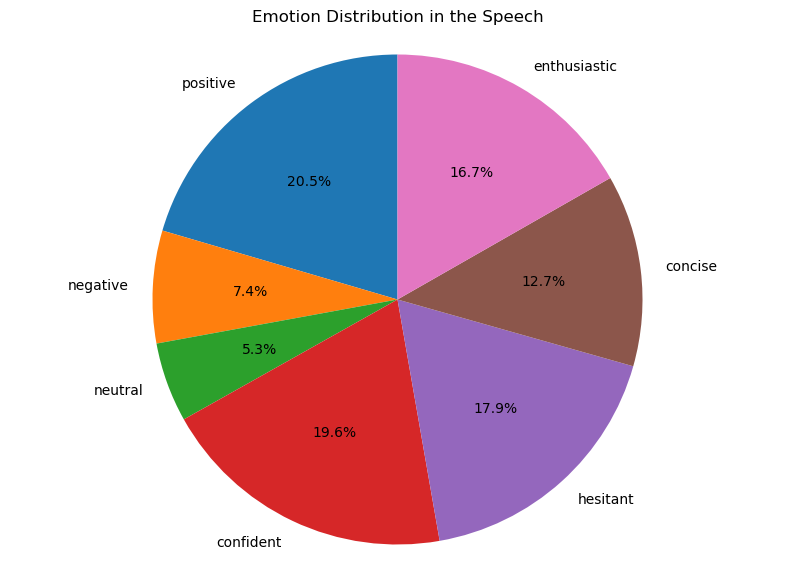

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

emotions = speech.columns[10:-1]
avg = speech[emotions].mean()

top3 = avg.sort_values(ascending = False).head(3)
print('The Three most Dominant emotions are:')
for emo , val in top3.items():
    print(f"{emo}: {val: .2f}")
    

plt.figure(figsize = (10 , 7))
plt.pie(avg , labels = avg.index , autopct ='%1.1f%%' , startangle = 90)
plt.title('Emotion Distribution in the Speech')
plt.axis('equal')
plt.show()

We can see the Three most dominant emotions depicted by the person.

## Trend Analysis

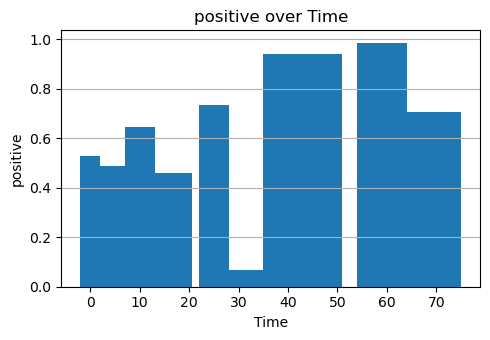

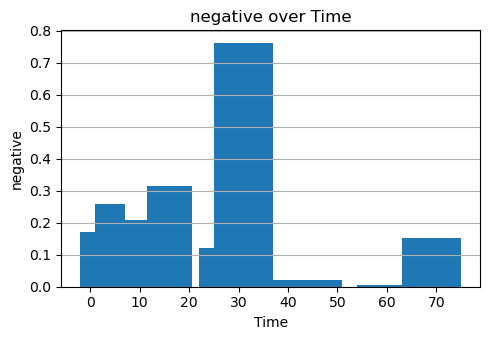

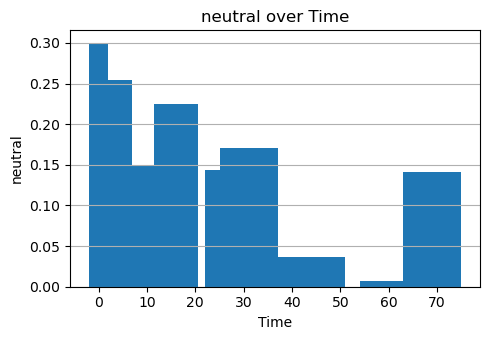

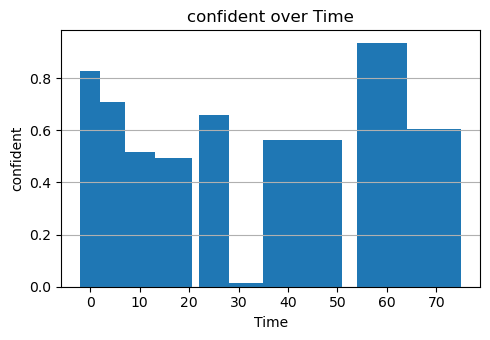

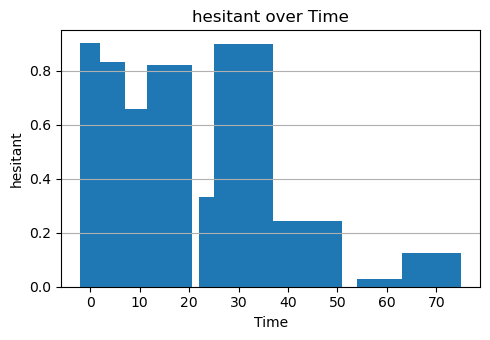

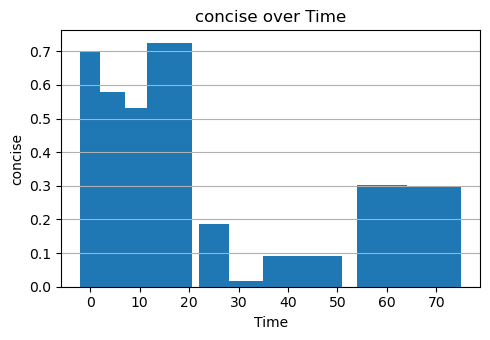

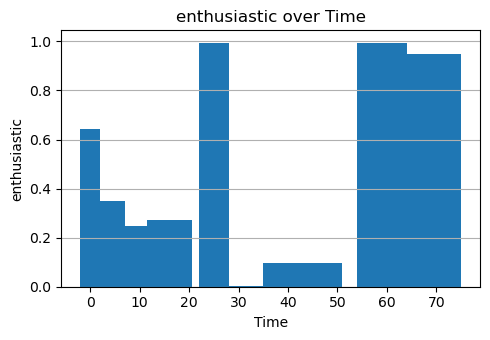

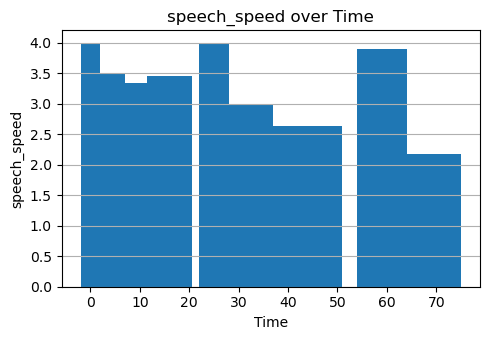

In [3]:

columns = speech.columns[10:]
for column in columns :
    plt.figure(figsize = (5 , 3.5))
    plt.bar(speech['start'] , speech[column] , width = (speech['end'] - speech['start']))
    
    plt.title(f'{column} over Time')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.grid(axis = 'y')
    plt.tight_layout()
    plt.show()

INFERENCES BASED ON THE ABOVE GRAPHS:

1. Overall, Person9's tone is pretty upbeat. However, you can spot clear dips in positivity when he talks about his stint at Agritech Farm, his passion for entrepreneurship, his interest in I'mbesideyou, and finally, when he applauds I'mbesideyou's algorithm for its societal contributions.   .

2. The confidence graph mirrors the positivity graph. So, it's clear that when the person is less positive about the topics mentioned earlier, their confidence also takes a dip.

3. There's a lot of hesitation at the beginning of the speech. However, it noticeably decreases when the person dives into discussing the motto of I'mbesideyou, the tech behind it, and its future prospects .

4. The conciseness drops significantly when the person progresses with their speech.

5. Peaks of enthusiasm are observed when the person talks about his prior work experience and how the deep learning algorithm of I'mbesideyou is helping the society. 




## Correlation Analysis

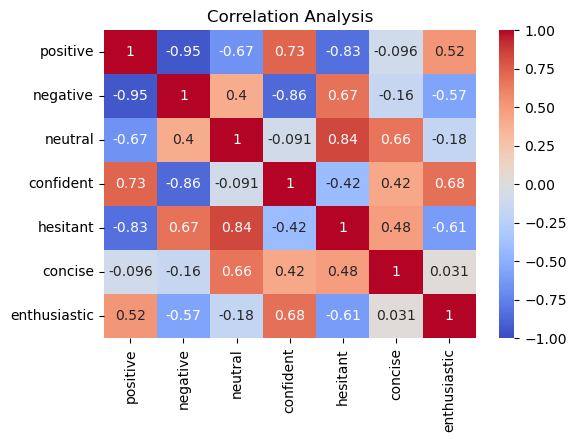

In [4]:
import seaborn as sns
selected = speech.columns[10:-1]
df = speech[selected]
corr = df.corr()

plt.figure(figsize = (6 , 4))
sns.heatmap(corr , annot = True , cmap = 'coolwarm' , vmin = -1 , vmax = 1)
plt.title("Correlation Analysis")
plt.show()

This heat map gives the correlation between emotions where strong correalations are generally (> 0.75 or < -0.75) and these strong correlations can be used to make inferences

# Analyzing the Emotion Dataset

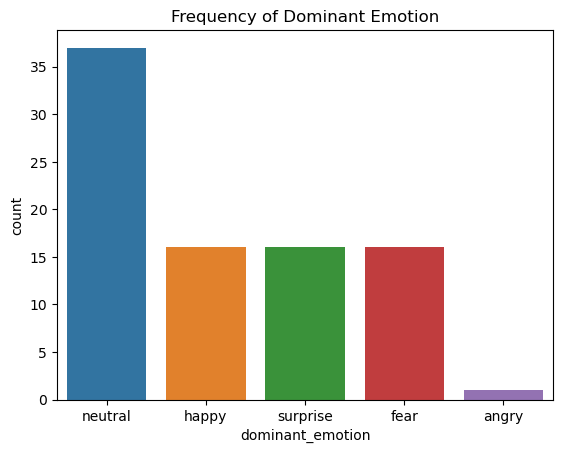

The most dominant emotion is 'neutral' with a count of 37.


In [5]:
sns.countplot(data = emotiono , x = 'dominant_emotion')
plt.title('Frequency of Dominant Emotion')
plt.show()

emotion_counts = emotiono['dominant_emotion'].value_counts()
max_emotion = emotion_counts.idxmax()
max_count = emotion_counts.max()

print(f"The most dominant emotion is '{max_emotion}' with a count of {max_count}.")

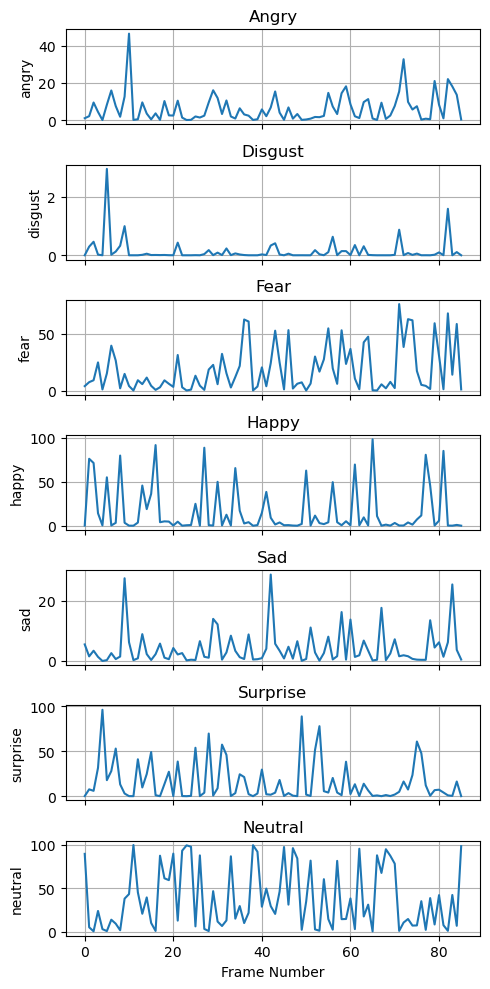

In [6]:
emotion_columns = emotiono.columns[2:-1]
fig, axes = plt.subplots(nrows=len(emotion_columns), figsize=(5 , 10), sharex=True)

x_range = range(0,len(emotiono))

for ax, emotion_col in zip(axes, emotion_columns):
    ax.plot(x_range, emotiono[emotion_col], label=emotion_col)
    ax.set_ylabel(emotion_col)
    ax.grid(True)
    ax.set_title(emotion_col.capitalize())

plt.xlabel('Frame Number')
plt.tight_layout()
plt.show()

From the emotional graphs of the candidate's speech, a pronounced 'neutral' tone is evident, paired with occasional, balanced spikes in 'surprise', 'happy', and 'fear'. This suggests a candidate who primarily communicates factually, with occasional moments of insight, enthusiasm, and vulnerability. The pattern indicates a blend of methodical communication peppered with genuine emotional undertones

## Analyzing the Gaze Dataset


In [7]:
print(f"Percentage of frames with eye contact: {gaze['gaze'].mean() * 100:.2f}%")
print(f"Percentage of frames with blinks: {gaze['blink'].mean() * 100:.2f}%")

Percentage of frames with eye contact: 96.51%
Percentage of frames with blinks: 2.33%


Given that the speaker maintains eye contact in 96.51% of the frames, they radiate immense confidence and ensure near-constant engagement with the audience. However, the blink rate of 2.33% is on the lower side, indicating an extreme focus, potentially to the point of seeming overly controlled or rehearsed. The speaker's unwavering gaze suggests mastery over their content, yet a slightly higher blink rate might bring a more relatable and human touch to their delivery.

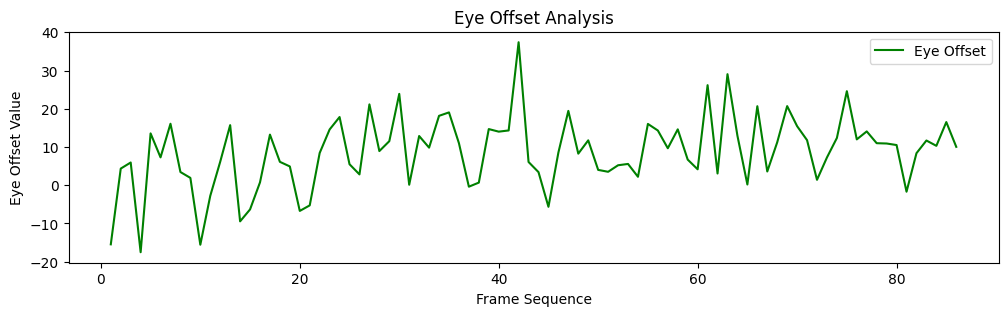

In [8]:
plt.figure(figsize=(12,3))
plt.plot(gaze['image_seq'], gaze['eye_offset'], label='Eye Offset', color='green')
plt.xlabel('Frame Sequence')
plt.ylabel('Eye Offset Value')
plt.title('Eye Offset Analysis')
plt.legend()
plt.show()

The frequent peaks in the eye_offset graph indicate that the speaker's gaze deviates from the center regularly. This could be due to reasons like referencing notes, emphasizing certain points, or potential distractions. Such variations might also indicate moments of contemplation or trying to recall specific details or in some cases lack of confidence.

# Overall Summary

Person9 maintains an optimistic tone, with noticeable dips in positivity when discussing Agritech Farm and I'mbesideyou's societal impact, which also aligns with dips in confidence. Initially, the speech is riddled with hesitation, but this diminishes when discussing I'mbesideyou's tech and motto. They become less concise as they progress, with enthusiasm peaking during discussions about work and I'mbesideyou's algorithm. Despite a predominantly 'neutral' tone, occasional emotional shifts suggest balanced communication. Their impressive 96.51% eye contact screams confidence, though a minimal 2.33% blink rate might feel rehearsed. Regular gaze deviations could hint at referencing points or slight uncertainty.